# Лабораторная №6

##  Вариант №15

In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
%matplotlib inline 

### Матрица из примера

In [2]:
C = np.array([[2, 1, 3],
              [3, 0, 1],
              [1, 2, 1]])
print(det(C))

12.0


### Исходная матрица

In [3]:
C = np.array([[18, 13, 15],
              [ 0, 13, 16],
              [ 1, 17, 12]])
print(C)
print(det(C))

[[18 13 15]
 [ 0 13 16]
 [ 1 17 12]]
-2074.9999999999995


## Аналитический метод

In [4]:
u = np.ones(C.shape[0])
u

array([1., 1., 1.])

In [5]:
v = 1/(u.dot(inv(C)).dot(u))
v

14.115646258503403

In [6]:
x_star = u.dot(inv(C))*v
print(x_star)
print(np.sum(x_star))

[ 0.76870748 -0.04761905  0.27891156]
1.0


In [7]:
y_star = inv(C).dot(u)*v
print(y_star)
print(np.sum(y_star))

[0.02721088 0.4829932  0.48979592]
0.9999999999999998


## Метод Брауна-Робинсон

In [8]:
# выбор стратегий игроков
def brown_robinson_step(a_strats_count, b_strats_count, matrix_c):
    a_gains = matrix_c.dot(b_strats_count)
    b_gains = a_strats_count.dot(matrix_c)
    
    return np.argmax(a_gains), np.argmin(b_gains)

def solve_brown_robinson(matrix_c, requred_epsilon=0, max_steps=100000):
    a_strats_count = np.zeros(matrix_c.shape[0])
    b_strats_count = np.zeros(matrix_c.shape[1])
    
    epsilon_history = []
    epsilon = 0
    
    i = 0
    j = 0
    k = 0
    # Задание числа, заведомо большего чем требуемая погрешность
    epsilon = 2
    
    while k < max_steps and epsilon > requred_epsilon:
        a_strats_count[i] += 1
        b_strats_count[j] += 1
        k += 1
        
        i, j = brown_robinson_step(a_strats_count, b_strats_count, matrix_c)
        
        v_overline = np.max(matrix_c.dot(b_strats_count))
        v_underline = np.min(a_strats_count.dot(matrix_c))
        
        epsilon = v_overline/k - v_underline/k
        epsilon_history.append(epsilon)
        
    return {
        'steps' : k,
        'epsilon' : epsilon,
        'history' : epsilon_history,
        'Alice probs' : a_strats_count / k,
        'Bob probs' : b_strats_count / k,
        'v_overline' : v_overline / k,
        'v_underline' : v_underline / k,
        'iterations' : k
    }

In [9]:
# Решение
result = solve_brown_robinson(C, requred_epsilon=0.1)

### Зависимость погрешности от итерации

Iterations: 2450


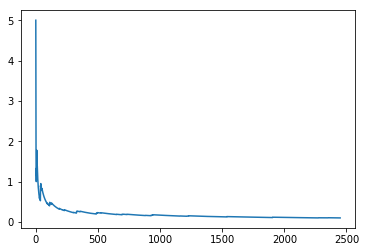

In [10]:
print('Iterations:', result['iterations'])
plt.plot(result['history'])
plt.plot(1)

### Итоговая погрешность

In [11]:
print('epsilon:', result['epsilon'])
print('(v_overline, v_underline):', result['v_overline'], result['v_underline'])

epsilon: 0.09999999999999964
(v_overline, v_underline): 14.014285714285714 13.914285714285715


### Стратегии игроков

In [12]:
print('Player A strategies:', result['Alice probs'], '; sum:', np.sum(result['Alice probs']))
print('Player B strategies:', result['Bob probs'], '; sum:', np.sum(result['Bob probs']))

Player A strategies: [0.77142857 0.         0.22857143] ; sum: 1.0
Player B strategies: [0.20285714 0.79714286 0.        ] ; sum: 1.0


## Сравнение с аналитическим методом

In [13]:
print(np.abs(v - result['v_overline']))
print(np.abs(v - result['v_underline']))
print(np.abs(x_star - result['Alice probs']))
print(np.abs(y_star - result['Bob probs']))
v

0.10136054421768925
0.2013605442176889
[0.00272109 0.04761905 0.05034014]
[0.17564626 0.31414966 0.48979592]


14.115646258503403